In [1]:
from PIL import Image
import numpy as np
import os
import sys

In [2]:
import glob  #file pattern matching


In [3]:
print(os.getcwd())

C:\Users\pramo\Downloads\face-to-bmi\Data


#to resize all the images to 150*150 size
width=150
height=150
img_num=0
for filename in glob.glob('Images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    im=Image.open(filename).convert('L')#pillow to load image and convert to greyscale image
    out=im.resize((width,height),Image.ANTIALIAS)
    out.save("C:/Users/pramo/Downloads/face-to-bmi/Data/Resize_images/img_{}.bmp".format(img_num))
    img_num+=1
   

In [4]:
image_list=[]
for filename in glob.glob('Resize_images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    img=Image.open(filename)#pillow to load image
    image_list.append(img)#adding images to image_list


In [5]:
len(image_list)

4206

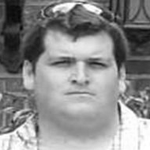

In [6]:
image_list[67]

In [7]:
#to find max size picture
maxx=0
count=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    #print(arr.shape)
    if(str(arr.shape)!='(52, 41)'):
        count+=1
print(count)
    #if(maxx<arr.size):
     #   maxx=arr.size
      #  string=str(arr.shape)
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
#print(maxx,string)      

4206


In [8]:
meeee=np.array(image_list[0])
meee=meeee.flatten()
meee.shape

(22500,)

In [9]:
#to find min size picture
minn_x=np.array(image_list[0])
minn=minn_x.size
img_c=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    if(minn>arr.size):
        print(img_c)
        minn=arr.size
        string_min="hiwdd"
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
print(minn) 

22500


In [10]:
x=np.empty([1,3])
a=np.array([[11,2,3]])
b=np.array([[1,22,13]])
a.shape
a=np.append(a,b,axis=0)
#vvv=np.array(image_list[0])
#vvv=vvv.flatten()
#vvv=vvv.reshape(1,22500)
a

array([[11,  2,  3],
       [ 1, 22, 13]])

In [11]:
#to convert images to array=>1d array=>2d array 
#appending all the image vectors to X_img vector
temp=1
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    arr_1d=arr.flatten()#to convert into 1D array
    arr_2d=arr_1d.reshape(1,22500) #to convert 1D to 2D array
    if(temp==1):
        X_img=arr_2d
        temp=0
    else:
        X_img=np.append(X_img,arr_2d,axis=0)#to add new rows to the X_image data



In [12]:
X_img.shape

(4206, 22500)

In [13]:
#standardising data(setting mean=0,variance=1)
from sklearn.preprocessing import StandardScaler

In [14]:
X_P_img=StandardScaler().fit_transform(X_img)

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:

from sklearn.decomposition import PCA

In [16]:
#princinple components choosen should be 95% of variance
pca=PCA(.95)

In [17]:
#to find out principle components from X_P_img
pca.fit(X_P_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
#no:of principle components
pca.n_components_

355

In [19]:
X_P_img=pca.transform(X_P_img)

In [20]:
X_P_img.shape

(4206, 355)

In [21]:

import pandas as pd
#to read_csv file
data_unclean=pd.read_csv('data.csv')
#to show top 5rows
data_unclean.head()



,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [22]:
#to remove unnamed coloums in data
data=data_unclean.loc[:,~data_unclean.columns.str.contains('^Unnamed')]

data.head()



,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [23]:
#should include is_training?
x_train=data.loc[:,['gender']]

x_train.head()


,gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [24]:
from sklearn.preprocessing import LabelEncoder#to convert categorical data to numerical data(gender col)

In [25]:
number=LabelEncoder()


In [26]:
x_train=number.fit_transform(x_train['gender'].astype('str'))

In [27]:
x_train=x_train.reshape(4206,1)

In [28]:
y_train=data.loc[:,['bmi']]
y_train=np.array(y_train)
y_train.shape

(4206, 1)

In [29]:
X_train=np.append(x_train,X_P_img,axis=1)
X_train.shape

(4206, 356)

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2)

In [32]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,350,351,352,353,354,355
0,1.0,70.524742,14.902861,-6.421718,5.562491,-30.563564,-25.897696,35.338037,13.742696,-25.077080,...,2.375107,-3.750649,-0.038531,-1.216012,0.866227,-3.613046,4.146237,-1.515246,-1.649561,3.231972
1,0.0,-11.081222,15.183956,53.732927,16.365751,34.194415,-10.137211,2.791650,7.757449,-34.127320,...,0.127159,-2.042385,-0.445347,0.189230,-0.555263,0.347836,-0.184994,0.728659,-1.284417,0.736503
2,0.0,-18.855069,21.231030,32.339970,0.876877,0.545724,43.645752,22.302789,10.377075,-12.827678,...,-0.825198,1.346863,-1.514594,-1.344444,-1.291984,0.613141,2.238676,-0.582092,1.142693,3.093449
3,1.0,68.805769,50.302463,-34.015390,85.115025,22.387317,52.550052,-32.705268,21.697103,-0.373208,...,2.795592,0.983291,-0.382325,-1.211761,-1.762133,-0.990564,2.740922,0.370281,0.839541,3.105736
4,1.0,-43.079430,-39.848891,-85.127052,-65.054578,-8.901061,-45.017247,-29.057748,9.410979,-15.345331,...,-0.963229,-2.965584,0.565546,0.273925,2.552316,0.886304,-0.467448,-0.956730,-0.044881,0.054979
5,1.0,20.543571,18.862828,36.152676,-40.069666,-2.900723,5.092437,11.212603,24.626995,-14.633938,...,-2.624968,1.847232,-1.967464,-3.403268,0.014245,-2.387289,-0.727365,3.837548,-1.157371,-0.248477
6,0.0,-23.206688,-23.146056,36.996487,-6.491687,-42.810653,-46.410736,28.863432,-77.899116,-20.985018,...,-0.580718,0.539932,-0.227466,2.283745,-1.659554,-1.033848,1.085832,2.149941,-0.533389,1.032753
7,1.0,-5.829504,-25.231584,-18.383845,-31.166408,-23.431095,-6.276976,-11.311971,22.480450,-7.060968,...,1.005722,-1.262288,2.557236,1.253329,4.016995,-0.399491,1.167253,-2.156661,1.004901,0.600904
8,1.0,1.554842,-27.788480,0.381648,7.052669,-4.813988,14.051335,-74.449618,2.438040,-40.734938,...,-0.779217,-2.864662,0.306188,2.063692,1.931169,-0.848060,-1.102244,-1.455761,1.825495,2.192294
9,1.0,24.802751,-102.080283,37.624259,1.971351,-3.036739,15.642522,-33.220431,13.290032,56.058739,...,-1.850615,2.176985,0.699835,0.580381,0.373439,-4.027700,-0.970510,0.944138,-0.244572,-3.049338


In [33]:
X_test.shape

(842, 356)

In [34]:
X_train.shape

(3364, 356)

In [35]:
y_train.shape

(3364, 1)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linear=LinearRegression()

In [38]:
model=linear.fit(X_train,y_train)

In [39]:
prediction=model.predict(X_test)

In [40]:
prediction

array([[32.56798738],
       [31.485865  ],
       [31.60039338],
       [29.04101761],
       [33.4141882 ],
       [35.86921215],
       [29.268225  ],
       [30.13657937],
       [33.16426199],
       [32.6875982 ],
       [33.24396087],
       [29.86790579],
       [31.18186615],
       [34.75367584],
       [31.37297213],
       [30.80076704],
       [36.92399169],
       [21.07364102],
       [30.51990677],
       [32.06434935],
       [32.89883841],
       [33.48121521],
       [34.17126501],
       [30.69131571],
       [33.69098198],
       [32.87273702],
       [32.26251947],
       [33.4696709 ],
       [31.29387969],
       [36.57179525],
       [35.01122192],
       [27.22716408],
       [32.77756997],
       [32.79701998],
       [35.68029449],
       [32.82866981],
       [31.87600584],
       [39.06346152],
       [32.10815934],
       [34.28495816],
       [32.25971787],
       [34.82889009],
       [35.36426218],
       [30.46622475],
       [31.98093591],
       [34

In [46]:
#R2_score on the linear regression
score=model.score(X_test,y_test)


print("score on linear regression:{}".format(score))

score on linear regression:-0.15568668289956644


In [42]:
#MSE calculation
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_test,prediction)

print("mean_squared_error on linear regression:{}".format(MSE))

mean_squared_error on linear regression:68.44845438777968


In [43]:
#variance calculation
er = []
for i in range(len(y_test)):
    #print( "actual=", y_test[i], " observed=", prediction[i])
    x = (y_test[i] - prediction[i]) **2
    er.append(x)


variance=np.var(er)

print("variance on linear regression model:{}".format(variance))

variance on linear regression model:12756.06217403327


In [44]:
#for plotting predicted values and true values(y_test)
from  matplotlib import pyplot as plt 

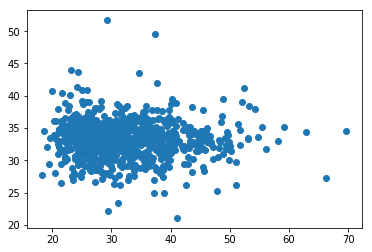

In [45]:
plt.scatter(y_test,prediction)